In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tangent_boundaries as tb
from math import pi

def staircase_function(energy, spectrum, nbins = 41):
    '''Staircase function.'''
    return np.where(np.sort(np.append(spectrum, energy))==energy)[0][0]

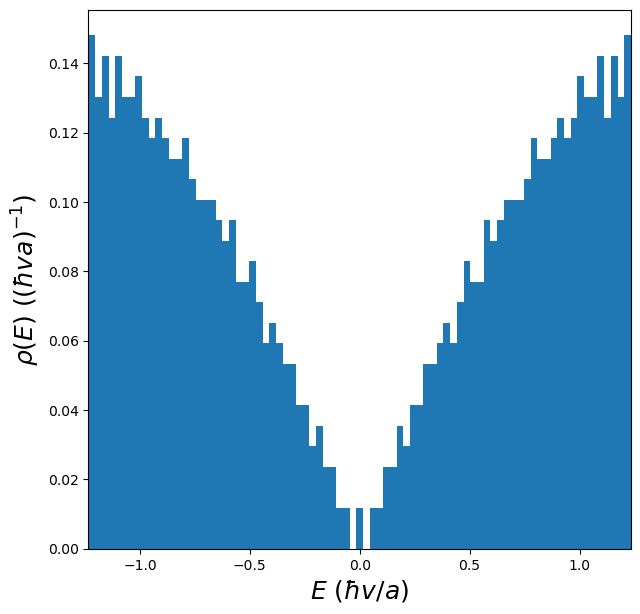

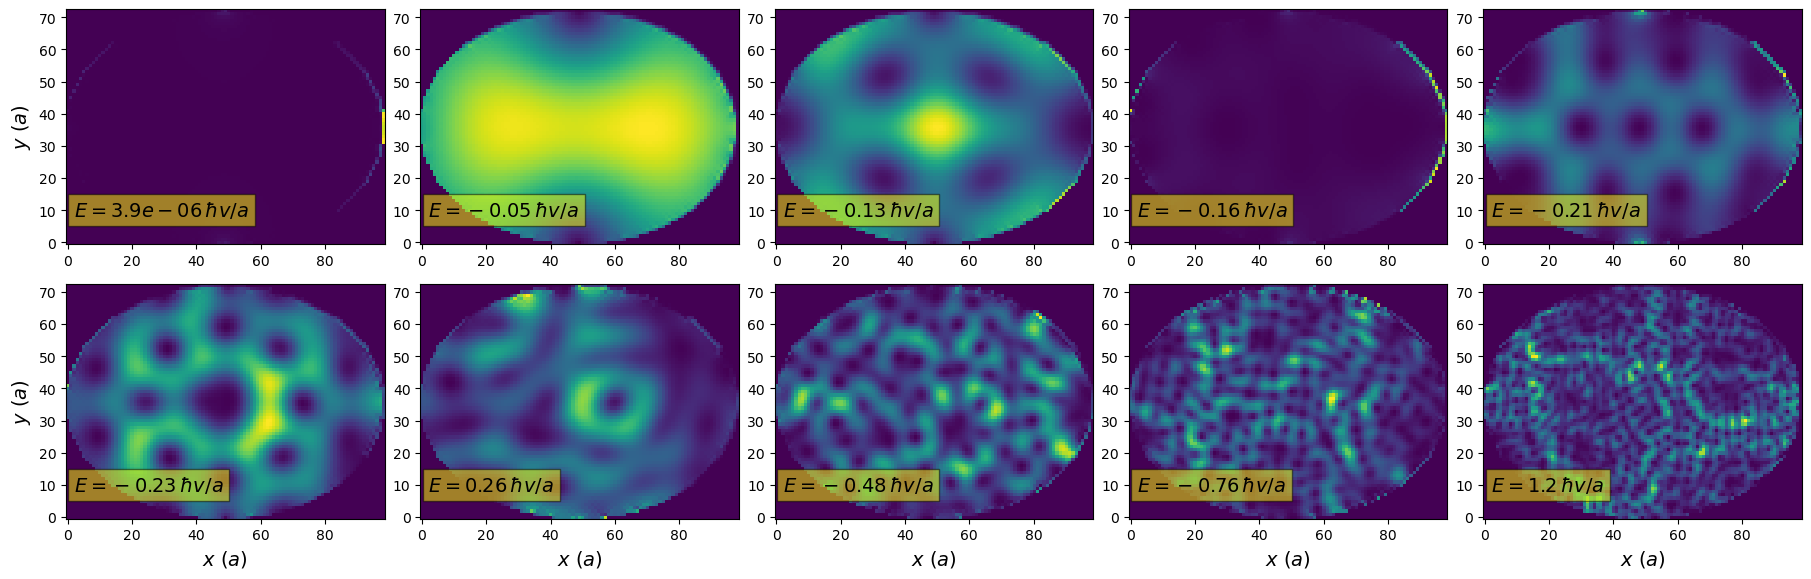

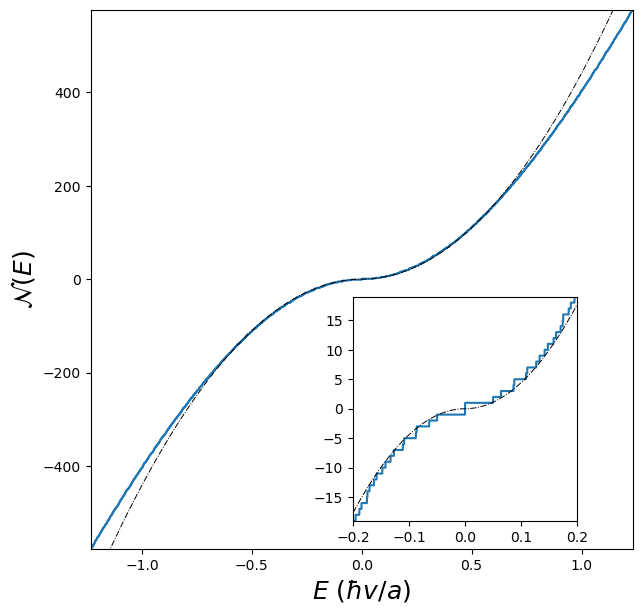

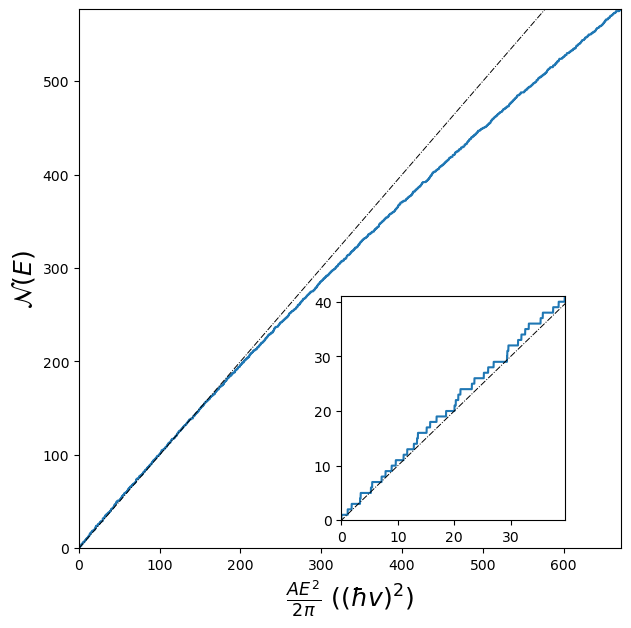

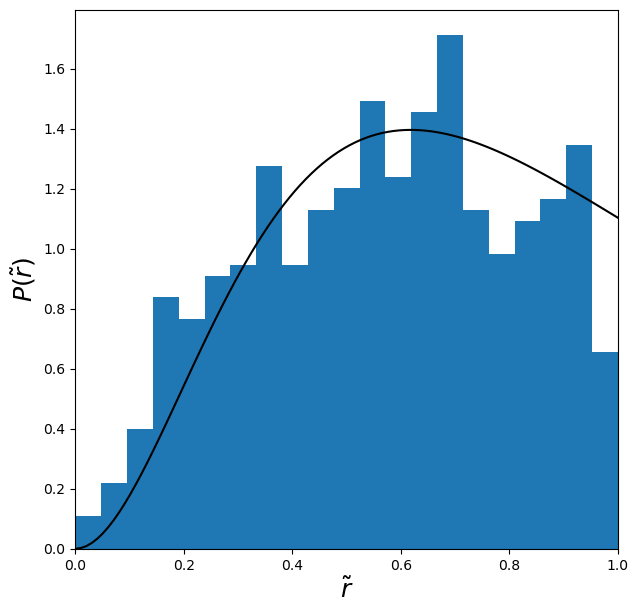

In [2]:
thetas = [0,1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

i = -1 ### selected value of theta
Nx = 99
Ny = 73
nbands = int((Nx*Ny)/100*16)

parameters = dict(
    Nx = Nx,
    Ny = Ny,
    B1 = 0, # no magnetic field
    N1 = 0, #
    d1 = 0, # These are irrelevant for B1 = 0
    N2 = 0, #
    potential = lambda x,y:0.0*np.random.rand(Ny,Nx),
    mass = lambda x,y:0*x,
    disorder = 0,
    theta = -(pi/2)*(thetas[i]/100),
)

#path = '/home/donisvelaa/data1/tangent_boundaries/final/'
name = 'ellipse_spectrum'
#spectrum_ellipse = np.load(path+name+'_Nx'+str(Nx)+'_Ny'+str(Ny)+'_theta'+str(theta)+'.npy', allow_pickle=True)
spectrum_ellipse = np.load(name+'_Nx'+str(parameters['Nx'])+'_Ny'+str(parameters['Ny'])+'_theta'+str(thetas[i])+'_nbands'+str(nbands)+'.npy', allow_pickle=True)
name = 'ellipse_states'
states_ellipse = np.load(name+'_Nx'+str(parameters['Nx'])+'_Ny'+str(parameters['Ny'])+'_theta'+str(thetas[i])+'_nbands'+str(nbands)+'.npy', allow_pickle=True)

nbins = 81
ellipse_DOS, bin_edges_ellipse_DOS = np.histogram(spectrum_ellipse, bins = nbins, range = (-max(spectrum_ellipse),max(spectrum_ellipse)), density = False)

area_ellipse = (parameters['Nx']//2)*(parameters['Ny']//2)*pi
x = (bin_edges_ellipse_DOS[1:]+bin_edges_ellipse_DOS[:-1])/2
dx = (bin_edges_ellipse_DOS[1]-bin_edges_ellipse_DOS[0])

fig_ellipse_DOS = plt.figure(figsize = (7,7))
ax_ellipse_DOS = fig_ellipse_DOS.add_subplot(111)
ax_ellipse_DOS.bar(x,ellipse_DOS/dx/area_ellipse,width = dx)
ax_ellipse_DOS.set_ylabel(r"$\rho(E)$ ($(\hbar v a)^{-1}$)",fontsize = 18)
ax_ellipse_DOS.set_xlabel(r"$E$ ($\hbar v/a$)",fontsize = 18)
ax_ellipse_DOS.set_xlim(min(spectrum_ellipse),max(spectrum_ellipse))

fig_ellipse_DOS.savefig('ellipse_DOS.pdf')


list_to_plot = [0,2,14,22,38,50,61,204,480,1132]


fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(18, 18*0.32), layout = 'constrained')
axs = axs.flat

for i, state_num in enumerate(list_to_plot):
    to_plot = states_ellipse[state_num,:,:,:]
    
    axs[i].imshow(np.sum(np.abs(to_plot)**2,axis = 0),vmin = 0, origin= 'lower')
    formatted_number = f"{spectrum_ellipse[state_num]:.2}"
    axs[i].text(2, 8,rf'$E ={formatted_number}\, \hbar v /a$' , fontsize=14, bbox=dict(facecolor='yellow', alpha=0.5))
    if i%5 == 0:
        axs[i].set_ylabel(r"$y$ ($a$)",fontsize = 14)
    if i // 5 == 1:
        axs[i].set_xlabel(r"$x$ ($a$)",fontsize = 14)
fig.savefig('ellipse_states.pdf')


def staircase_function(energy, spectrum, nbins = 41):
    '''Staircase function.'''
    return np.where(np.sort(np.append(spectrum, energy))==energy)[0][0]

energies_ellipse = np.linspace(-max(spectrum_ellipse), max(spectrum_ellipse),10000)
#energies_ellipse = np.linspace(-0.3, 0.3,1000)
staircase_ellipse = np.zeros(len(energies_ellipse))
for i, e in enumerate(energies_ellipse):
    staircase_ellipse[i] = staircase_function(e,spectrum_ellipse)

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)
ax.plot(energies_ellipse, staircase_ellipse+1-staircase_ellipse[len(staircase_ellipse)//2]*np.ones(len(staircase_ellipse)))
ax.plot(energies_ellipse, energies_ellipse/np.abs(energies_ellipse)*area_ellipse*energies_ellipse**2/4/pi, ls = '-.', c = 'k',lw = 0.7)
ax.set_ylabel(r"$\mathcal{N}(E)$",fontsize = 18)
ax.set_xlabel(r"$E$ ($\hbar v/a$)",fontsize = 18)
ax.set_ylim(-max(staircase_ellipse+1-staircase_ellipse[len(staircase_ellipse)//2]*np.ones(len(staircase_ellipse))),max(staircase_ellipse+1-staircase_ellipse[len(staircase_ellipse)//2]*np.ones(len(staircase_ellipse))))
ax.set_xlim(-max(energies_ellipse),max(energies_ellipse))

energies_ellipse = np.linspace(-0.2, 0.2,10000)
staircase_ellipse = np.zeros(len(energies_ellipse))
for i, e in enumerate(energies_ellipse):
    staircase_ellipse[i] = staircase_function(e,spectrum_ellipse)

left, bottom, width, height = [0.5, 0.15, 0.32, 0.32]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(energies_ellipse, staircase_ellipse+1-staircase_ellipse[len(staircase_ellipse)//2]*np.ones(len(staircase_ellipse)))
ax2.plot(energies_ellipse, energies_ellipse/np.abs(energies_ellipse)*area_ellipse*energies_ellipse**2/4/pi, ls = '-.', c = 'k',lw = 0.7)

ax2.set_ylim(-max(staircase_ellipse+1-staircase_ellipse[len(staircase_ellipse)//2]*np.ones(len(staircase_ellipse))),max(staircase_ellipse+1-staircase_ellipse[len(staircase_ellipse)//2]*np.ones(len(staircase_ellipse))))
ax2.set_xlim(-max(energies_ellipse),max(energies_ellipse))

fig.savefig('ellipse_staircase.pdf')


energies_ellipse = np.linspace(-max(spectrum_ellipse), max(spectrum_ellipse),10000)
#energies_ellipse = np.linspace(-0.3, 0.3,1000)
staircase_ellipse = np.zeros(len(energies_ellipse))
for i, e in enumerate(energies_ellipse):
    staircase_ellipse[i] = staircase_function(e,spectrum_ellipse)


fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)
ax.plot(area_ellipse*energies_ellipse**2/4/pi, staircase_ellipse+1-staircase_ellipse[len(staircase_ellipse)//2]*np.ones(len(staircase_ellipse)))
ax.set_ylabel(r"$\mathcal{N}(E)$",fontsize = 18)
ax.set_xlabel(r"$\frac{A E^2}{2\pi}$ ($(\hbar v)^2$)",fontsize = 18)
ax.axline((0,0), slope = 1, ls = '-.', c = 'k',lw = 0.7)
ax.set_ylim(0,max(staircase_ellipse+1-staircase_ellipse[len(staircase_ellipse)//2]*np.ones(len(staircase_ellipse))))
ax.set_xlim(0,max(area_ellipse*energies_ellipse**2/4/pi))


energies_ellipse = np.linspace(-0.3, 0.3,10000)
staircase_ellipse = np.zeros(len(energies_ellipse))
for i, e in enumerate(energies_ellipse):
    staircase_ellipse[i] = staircase_function(e,spectrum_ellipse)

left, bottom, width, height = [0.5, 0.15, 0.32, 0.32]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(area_ellipse*energies_ellipse**2/4/pi, staircase_ellipse+1-staircase_ellipse[len(staircase_ellipse)//2]*np.ones(len(staircase_ellipse)))
ax2.plot(area_ellipse*energies_ellipse**2/4/pi, energies_ellipse/np.abs(energies_ellipse)*area_ellipse*energies_ellipse**2/4/pi, ls = '-.', c = 'k',lw = 0.7)

ax2.set_ylim(0,max(staircase_ellipse+1-staircase_ellipse[len(staircase_ellipse)//2]*np.ones(len(staircase_ellipse))))
ax2.set_xlim(0,max(area_ellipse*energies_ellipse**2/4/pi))

fig.savefig('ellipse_staircase_unfolded.pdf')


def spacing_ratios_distribution(spectrum, nbins = 41):
    
    spacings = (np.sort(spectrum)-np.roll(np.sort(spectrum),1))[1:]
    ratios = (spacings/np.roll(spacings,1))[1:]
    ratios = np.where(ratios<1, ratios, 1/ratios)
    histogram, bin_edges = np.histogram(ratios, range = (0,1), bins = nbins, density = True )
    
    return histogram, bin_edges

nbins_spacing = 21
ratios_distribution_ellipse, bin_edges_ellipse = spacing_ratios_distribution(spectrum_ellipse, nbins = nbins_spacing)

x_ellipse = (bin_edges_ellipse[1:]+bin_edges_ellipse[:-1])/2
dx_ellipse = (bin_edges_ellipse[1]-bin_edges_ellipse[0])
x_analytical = np.linspace(0,1,100)
analytical_gue = (81*np.sqrt(3)/(2*pi))*(x_analytical+x_analytical**2)**2/(1+x_analytical+x_analytical**2)**4

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)
ax.bar(x_ellipse,ratios_distribution_ellipse,width = dx_ellipse)
ax.plot(x_analytical,analytical_gue, c = 'k')
ax.set_ylabel(r"$P(\tilde{r})$",fontsize = 18)
ax.set_xlabel(r"$\tilde{r}$",fontsize = 18)
ax.set_xlim(0,1)

fig.savefig('ellipse_spacings.pdf')

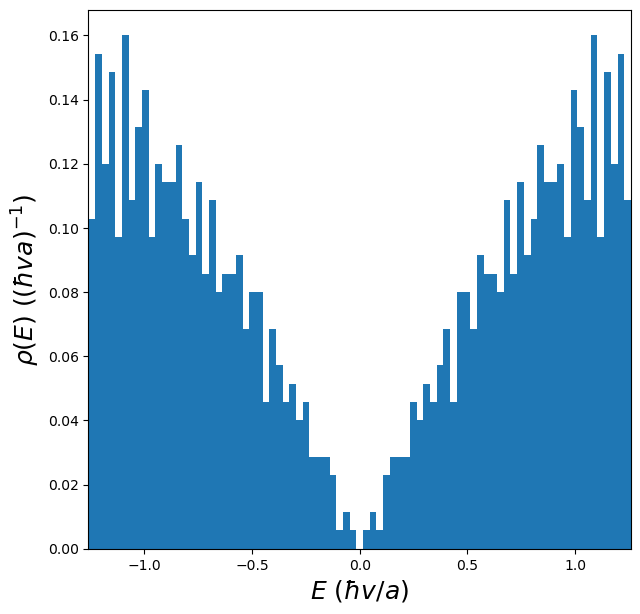

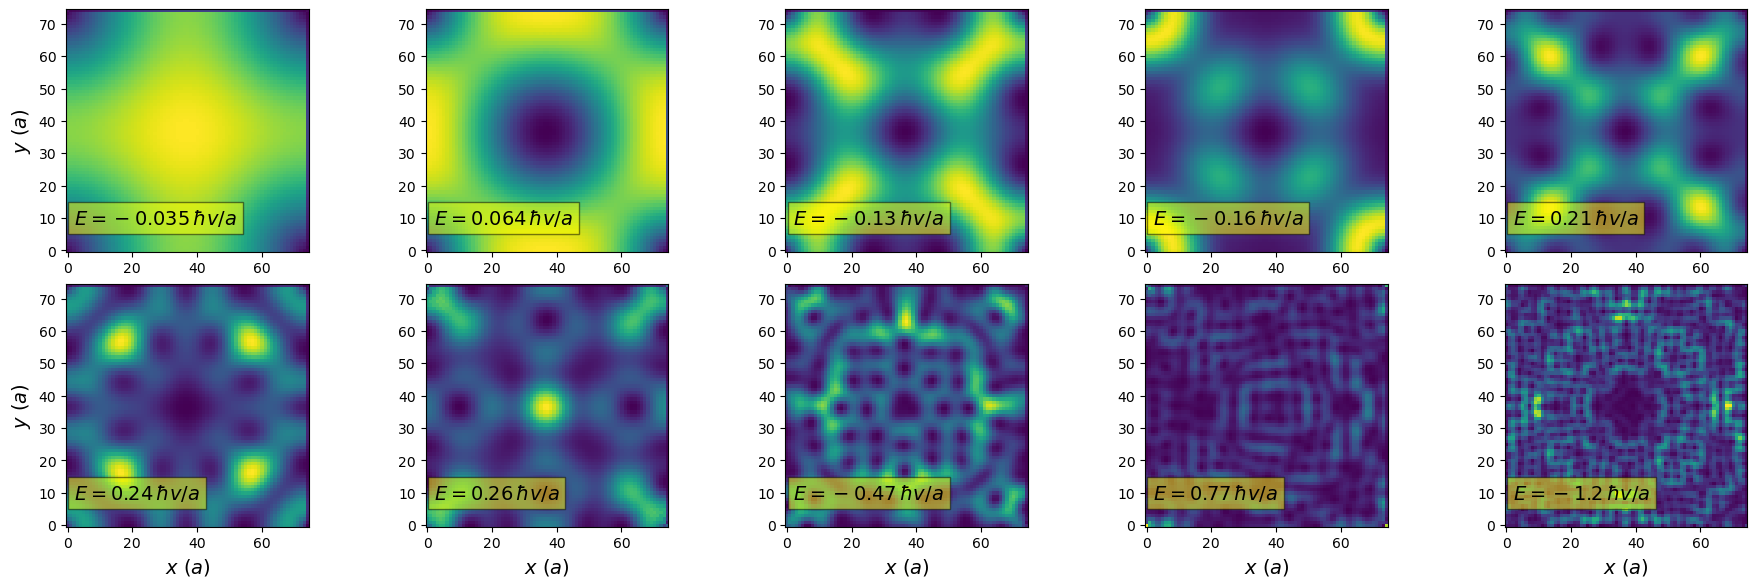

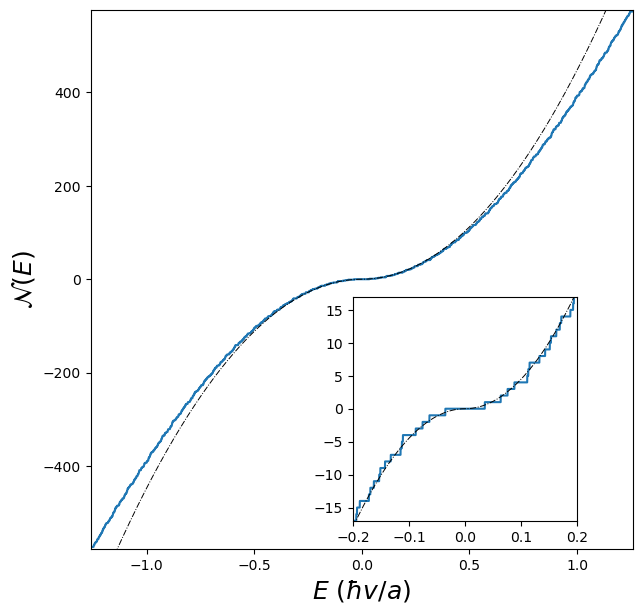

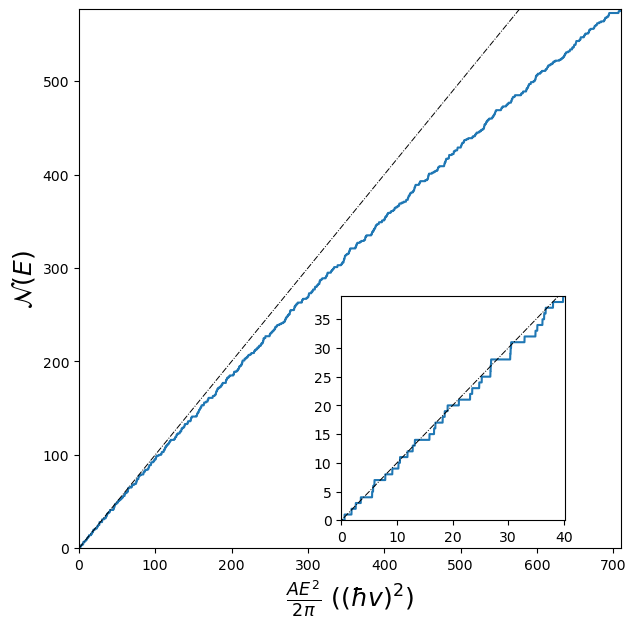

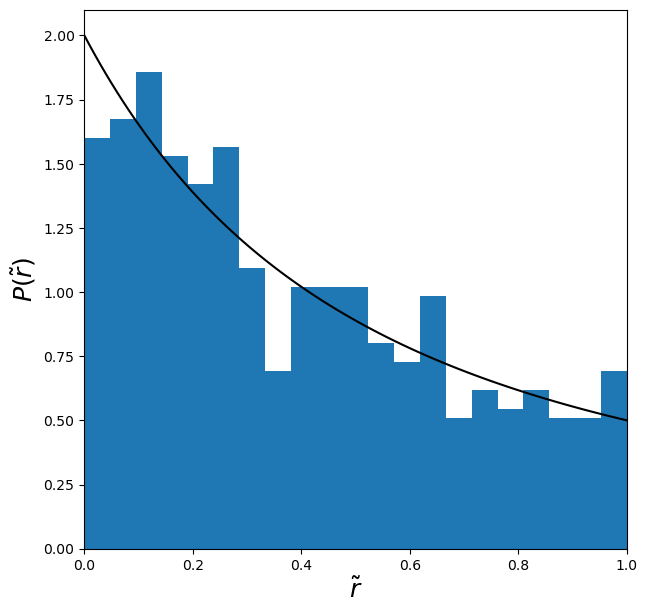

In [3]:
thetas = [0,1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

i = -1 ### selected value of theta
Nx = 99
Ny = 73
nbands = int((Nx*Ny)/100*16)

parameters = dict(
    Nx = Nx,
    Ny = Ny,
    B1 = 0, # no magnetic field
    N1 = 0, #
    d1 = 0, # These are irrelevant for B1 = 0
    N2 = 0, #
    potential = lambda x,y:0.0*np.random.rand(Ny,Nx),
    mass = lambda x,y:0*x,
    disorder = 0,
    theta = -(pi/2)*(thetas[i]/100),
)

parameters['Nx'] =  int(np.round(np.sqrt(pi*Nx*Ny/4))) # We want the square to have the same area as the ellipse
parameters['Ny'] =  int(np.round(np.sqrt(pi*Nx*Ny/4)))

#path = '/home/donisvelaa/data1/tangent_boundaries/final/'
name = 'square_spectrum'
#spectrum_square = np.load(path+name+'_Nx'+str(Nx)+'_Ny'+str(Ny)+'_theta'+str(theta)+'.npy', allow_pickle=True)
spectrum_square = np.load(name+'_Nx'+str(parameters['Nx'])+'_Ny'+str(parameters['Ny'])+'_theta'+str(thetas[i])+'_nbands'+str(nbands)+'.npy', allow_pickle=True)
name = 'square_states'
states_square = np.load(name+'_Nx'+str(parameters['Nx'])+'_Ny'+str(parameters['Ny'])+'_theta'+str(thetas[i])+'_nbands'+str(nbands)+'.npy', allow_pickle=True)

nbins = 81
square_DOS, bin_edges_square_DOS = np.histogram(spectrum_square, bins = nbins, range = (-max(spectrum_square),max(spectrum_square)), density = False)

area_square = parameters['Nx']*parameters['Ny']
x = (bin_edges_square_DOS[1:]+bin_edges_square_DOS[:-1])/2
dx = (bin_edges_square_DOS[1]-bin_edges_square_DOS[0])

fig_square_DOS = plt.figure(figsize = (7,7))
ax_square_DOS = fig_square_DOS.add_subplot(111)
ax_square_DOS.bar(x,square_DOS/dx/area_square,width = dx)
ax_square_DOS.set_ylabel(r"$\rho(E)$ ($(\hbar v a)^{-1}$)",fontsize = 18)
ax_square_DOS.set_xlabel(r"$E$ ($\hbar v/a$)",fontsize = 18)
ax_square_DOS.set_xlim(min(spectrum_square),max(spectrum_square))

fig_square_DOS.savefig('square_DOS.pdf')

list_to_plot = [0,2,14,22,38,50,61,204,480,1132]


fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(18, 18*0.32), layout = 'constrained')
axs = axs.flat

for i, state_num in enumerate(list_to_plot):
    to_plot = states_square[state_num,:,:,:]
    
    axs[i].imshow(np.sum(np.abs(to_plot)**2,axis = 0),vmin = 0, origin= 'lower')
    formatted_number = f"{spectrum_square[state_num]:.2}"
    axs[i].text(2, 8,rf'$E ={formatted_number}\, \hbar v /a$' , fontsize=14, bbox=dict(facecolor='yellow', alpha=0.5))
    if i%5 == 0:
        axs[i].set_ylabel(r"$y$ ($a$)",fontsize = 14)
    if i // 5 == 1:
        axs[i].set_xlabel(r"$x$ ($a$)",fontsize = 14)
fig.savefig('square_states.pdf')    


def staircase_function(energy, spectrum, nbins = 41):
    '''Staircase function.'''
    return np.where(np.sort(np.append(spectrum, energy))==energy)[0][0]

energies_square = np.linspace(-max(spectrum_square), max(spectrum_square),10000)
#energies_square = np.linspace(-0.3, 0.3,1000)
staircase_square = np.zeros(len(energies_square))
for i, e in enumerate(energies_square):
    staircase_square[i] = staircase_function(e,spectrum_square)

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)
ax.plot(energies_square, staircase_square -staircase_square[len(staircase_square)//2]*np.ones(len(staircase_square)))
ax.plot(energies_square, energies_square/np.abs(energies_square)*area_square*energies_square**2/4/pi, ls = '-.', c = 'k',lw = 0.7)
ax.set_ylabel(r"$\mathcal{N}(E)$",fontsize = 18)
ax.set_xlabel(r"$E$ ($\hbar v/a$)",fontsize = 18)
ax.set_ylim(-max(staircase_square -staircase_square[len(staircase_square)//2]*np.ones(len(staircase_square))),max(staircase_square -staircase_square[len(staircase_square)//2]*np.ones(len(staircase_square))))
ax.set_xlim(-max(energies_square),max(energies_square))

energies_square = np.linspace(-0.2, 0.2,10000)
staircase_square = np.zeros(len(energies_square))
for i, e in enumerate(energies_square):
    staircase_square[i] = staircase_function(e,spectrum_square)

left, bottom, width, height = [0.5, 0.15, 0.32, 0.32]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(energies_square, staircase_square -staircase_square[len(staircase_square)//2]*np.ones(len(staircase_square)))
ax2.plot(energies_square, energies_square/np.abs(energies_square)*area_square*energies_square**2/4/pi, ls = '-.', c = 'k',lw = 0.7)

ax2.set_ylim(-max(staircase_square -staircase_square[len(staircase_square)//2]*np.ones(len(staircase_square))),max(staircase_square -staircase_square[len(staircase_square)//2]*np.ones(len(staircase_square))))
ax2.set_xlim(-max(energies_square),max(energies_square))
fig.savefig('square_staircase.pdf')


energies_square = np.linspace(-max(spectrum_square), max(spectrum_square),10000)
#energies_square = np.linspace(-0.3, 0.3,1000)
staircase_square = np.zeros(len(energies_square))
for i, e in enumerate(energies_square):
    staircase_square[i] = staircase_function(e,spectrum_square)


fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)
ax.plot(area_square*energies_square**2/4/pi, staircase_square -staircase_square[len(staircase_square)//2]*np.ones(len(staircase_square)))
ax.set_ylabel(r"$\mathcal{N}(E)$",fontsize = 18)
ax.set_xlabel(r"$\frac{A E^2}{2\pi}$ ($(\hbar v)^2$)",fontsize = 18)
ax.axline((0,0), slope = 1, ls = '-.', c = 'k',lw = 0.7)
ax.set_ylim(0,max(staircase_square -staircase_square[len(staircase_square)//2]*np.ones(len(staircase_square))))
ax.set_xlim(0,max(area_square*energies_square**2/4/pi))


energies_square = np.linspace(-0.3, 0.3,10000)
staircase_square = np.zeros(len(energies_square))
for i, e in enumerate(energies_square):
    staircase_square[i] = staircase_function(e,spectrum_square)

left, bottom, width, height = [0.5, 0.15, 0.32, 0.32]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(area_square*energies_square**2/4/pi, staircase_square -staircase_square[len(staircase_square)//2]*np.ones(len(staircase_square)))
ax2.plot(area_square*energies_square**2/4/pi, energies_square/np.abs(energies_square)*area_square*energies_square**2/4/pi, ls = '-.', c = 'k',lw = 0.7)

ax2.set_ylim(0,max(staircase_square -staircase_square[len(staircase_square)//2]*np.ones(len(staircase_square))))
ax2.set_xlim(0,max(area_square*energies_square**2/4/pi))
fig.savefig('square_staircase_unfolded.pdf')


def spacing_ratios_distribution(spectrum, nbins = 41):
    
    spacings = (np.sort(spectrum)-np.roll(np.sort(spectrum),1))[1:]
    ratios = (spacings/np.roll(spacings,1))[1:]
    ratios = np.where(ratios<1, ratios, 1/ratios)
    histogram, bin_edges = np.histogram(ratios, range = (0,1), bins = nbins, density = True )
    
    return histogram, bin_edges

nbins_spacing = 21
ratios_distribution_square, bin_edges_square = spacing_ratios_distribution(spectrum_square, nbins = nbins_spacing)

x_square = (bin_edges_square[1:]+bin_edges_square[:-1])/2
dx_square = (bin_edges_square[1]-bin_edges_square[0])
x_analytical = np.linspace(0,1,100)
analytical_poisson = 2/(1+x_analytical)**2

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)
ax.bar(x_square,ratios_distribution_square,width = dx_square)
ax.plot(x_analytical,analytical_poisson, c = 'k')
ax.set_ylabel(r"$P(\tilde{r})$",fontsize = 18)
ax.set_xlabel(r"$\tilde{r}$",fontsize = 18)
ax.set_xlim(0,1)
fig.savefig('square_spacings.pdf')